<a href="https://colab.research.google.com/github/Dedulus/Dedulus/blob/main/International_Airline_Passengers_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [28]:
from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers (1).csv


{'AirPassengers.csv': b'Month,Passengers\r\n1949-01,112\r\n1949-02,118\r\n1949-03,132\r\n1949-04,129\r\n1949-05,121\r\n1949-06,135\r\n1949-07,148\r\n1949-08,148\r\n1949-09,136\r\n1949-10,119\r\n1949-11,104\r\n1949-12,118\r\n1950-01,115\r\n1950-02,126\r\n1950-03,141\r\n1950-04,135\r\n1950-05,125\r\n1950-06,149\r\n1950-07,170\r\n1950-08,170\r\n1950-09,158\r\n1950-10,133\r\n1950-11,114\r\n1950-12,140\r\n1951-01,145\r\n1951-02,150\r\n1951-03,178\r\n1951-04,163\r\n1951-05,172\r\n1951-06,178\r\n1951-07,199\r\n1951-08,199\r\n1951-09,184\r\n1951-10,162\r\n1951-11,146\r\n1951-12,166\r\n1952-01,171\r\n1952-02,180\r\n1952-03,193\r\n1952-04,181\r\n1952-05,183\r\n1952-06,218\r\n1952-07,230\r\n1952-08,242\r\n1952-09,209\r\n1952-10,191\r\n1952-11,172\r\n1952-12,194\r\n1953-01,196\r\n1953-02,196\r\n1953-03,236\r\n1953-04,235\r\n1953-05,229\r\n1953-06,243\r\n1953-07,264\r\n1953-08,272\r\n1953-09,237\r\n1953-10,211\r\n1953-11,180\r\n1953-12,201\r\n1954-01,204\r\n1954-02,188\r\n1954-03,235\r\n1954-04,227

In [29]:
# load the dataset
dataframe = pandas.read_csv('AirPassengers.csv',
usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [31]:
dataframe = pandas.read_csv('AirPassengers.csv')

In [32]:
dataframe.head(20)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [33]:
import seaborn as sns

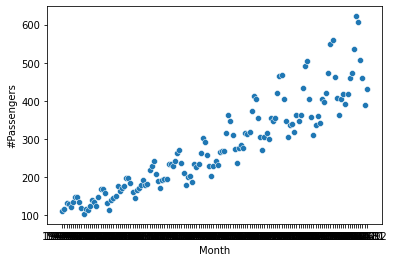

In [36]:
sns.scatterplot(data=dataframe, x="Month", y="#Passengers")

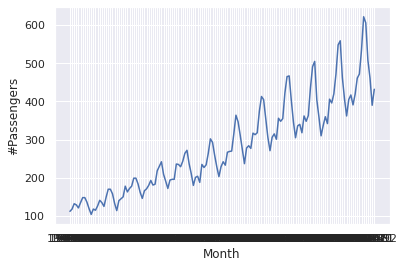

In [40]:
sns.lineplot(x="Month", y="#Passengers",
             data=dataframe)

In [ ]:
sns.

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

97 48


In [12]:
def create_dataset(dataset, look_back=1):
          dataX, dataY = [], []
          for i in range(len(dataset)-look_back-1):
                   a = dataset[i:(i+look_back), 0]
                   dataX.append(a)
                   dataY.append(dataset[i + look_back, 0])
          return numpy.array(dataX), numpy.array(dataY)


In [13]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [14]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
95/95 - 3s - loss: 0.0340 - 3s/epoch - 34ms/step
Epoch 2/100
95/95 - 0s - loss: 0.0152 - 137ms/epoch - 1ms/step
Epoch 3/100
95/95 - 0s - loss: 0.0124 - 147ms/epoch - 2ms/step
Epoch 4/100
95/95 - 0s - loss: 0.0113 - 162ms/epoch - 2ms/step
Epoch 5/100
95/95 - 0s - loss: 0.0103 - 146ms/epoch - 2ms/step
Epoch 6/100
95/95 - 0s - loss: 0.0093 - 138ms/epoch - 1ms/step
Epoch 7/100
95/95 - 0s - loss: 0.0087 - 145ms/epoch - 2ms/step
Epoch 8/100
95/95 - 0s - loss: 0.0076 - 138ms/epoch - 1ms/step
Epoch 9/100
95/95 - 0s - loss: 0.0068 - 139ms/epoch - 1ms/step
Epoch 10/100
95/95 - 0s - loss: 0.0060 - 140ms/epoch - 1ms/step
Epoch 11/100
95/95 - 0s - loss: 0.0053 - 150ms/epoch - 2ms/step
Epoch 12/100
95/95 - 0s - loss: 0.0046 - 154ms/epoch - 2ms/step
Epoch 13/100
95/95 - 0s - loss: 0.0041 - 141ms/epoch - 1ms/step
Epoch 14/100
95/95 - 0s - loss: 0.0036 - 142ms/epoch - 1ms/step
Epoch 15/100
95/95 - 0s - loss: 0.0032 - 136ms/epoch - 1ms/step
Epoch 16/100
95/95 - 0s - loss: 0.0029 - 142ms/epoc

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.10 RMSE
Test Score: 52.52 RMSE
